# 前処理

In [56]:
import pandas as pd
import numpy as np

meta_cus = ["ID", "生年", "最終学歴", "婚姻状況", "収入", "小児人数", "10代子供人数", "入会日", "最終購買日経過日数", "CP後P会員化有無"]

meta_log = ["ID", "購入日", "ワイン支払金額", "果物支払額", "肉製品支払額", "魚製品支払額", "菓子類支払額", "金属商品支払額", "ディスカウント有無"]

df = pd.read_csv('./big.csv').fillna(np.nan)
del df["dummy"]


#### 定義
##### train/test_customer.csv

|列名|列の定義|
|:--|:--|
|Id|顧客ID|
|Year_Birth|生年|
|Education|最終学歴|
|Marital_Status|婚姻状況|
|Income|収入|
|Kidhome|小児の人数|
|Teenhome|10代の子供の人数|
|Dt_Customer|入会日|
|Recency|最終購買日からの経過日数|
|Expected|プレミアム会員獲得のためのキャンペーン後にプレミアム会員化した有無|

##### train/test_log.csv

|列名|列の定義|
|:--|:--|
|Id|顧客ID|
|time_stamp|購入日|
|wine_sales|ワインへの支払金額(千円)|
|fruit_sales|果物への支払金額(千円)|
|meat_sales|肉や肉製品への支払金額(千円)|
|fish_sales|魚や魚製品への支払金額(千円)|
|sweet_sales|菓子類への支払金額(千円)|
|gold_sales|金属商品への支払金額(千円)|
|discount_flag|ディスカウントの適応有無|


# プロファイル

# データ品質チェック
## 欠損値チェック
```
収入に欠損値がある
```

In [65]:
df.isnull().any()


ID           False
生年           False
最終学歴         False
婚姻状況         False
収入            True
小児人数         False
10代子供人数      False
入会日          False
最終購買日経過日数    False
CP後P会員化有無    False
購入日          False
ワイン支払金額      False
果物支払額        False
肉製品支払額       False
魚製品支払額       False
菓子類支払額       False
金属商品支払額      False
ディスカウント有無    False
dtype: bool

## 各項目のチェック
```
サマリ
553人の顧客データがあり、6079件の購買データがある。
　・最高齢顧客は1893年生まれ
　・最年少顧客は1996年生まれ
　・ID:7244,239,3583,3606の4顧客は収入データがない
　・収入の最小5648, 最大は157243, 平均52912
　・小児有顧客は252人、10代子供有は264人いる。
　・最大の子供数は3人で平均は1人
　・子供有顧客は397、独り身顧客は156人

```

### customerテーブル

In [136]:
cus = df[meta_cus].drop_duplicates()
print("収入NULL", cus["ID"].count() - cus["収入"].count())
print("収入NULLのID",list(cus["ID"][cus["収入"].isnull()]))
res = cus.replace(0, np.nan).describe().T.astype(int)
family = len(cus[(cus["小児人数"] + cus["10代子供人数"]) > 0])
print("独り身顧客数", len(cus) - family)
print("子供あり顧客数", family)
res

収入NULL 4
収入NULLのID [7244, 9235, 4345, 3769]
独り身顧客数 156
子供あり顧客数 397


,count,mean,std,min,25%,50%,75%,max
ID,553,5665,3213,1,2952,5529,8418,11188
生年,553,1968,12,1893,1959,1970,1977,1996
収入,549,52912,21496,5648,35544,51315,70545,157243
小児人数,252,1,0,1,1,1,1,2
10代子供人数,264,1,0,1,1,1,1,2
最終購買日経過日数,543,48,28,1,24,48,73,99
CP後P会員化有無,48,1,0,1,1,1,1,1


### logテーブル
#### 全体の売上分析
```
1位:ワイン支払金額    131661  ←一番の売れ筋はワイン
2位:肉製品支払額       79557  ←意外に肉製品が売れてる
3位:魚製品支払額       18669  ←魚がかなり低い
4位:金属商品支払額     17561  ←貴金属という想定
5位:果物支払額         12973
6位:菓子類支払額       12844  ←日持ちすると思うがなぜか低い
```
* ワインと肉が特に強い可能性あり


In [154]:
logs = df[meta_log[2:-1]].sum()
print(logs.sort_values(ascending=False))
df[meta_log].describe().T.astype(int)

ワイン支払金額    131661
肉製品支払額      79557
魚製品支払額      18669
金属商品支払額     17561
果物支払額       12973
菓子類支払額      12844
dtype: int64


,count,mean,std,min,25%,50%,75%,max
ID,6079,5651,3206,1,2963,5283,8443,11188
ワイン支払金額,6079,21,30,0,3,11,27,376
果物支払額,6079,2,4,0,0,1,2,74
肉製品支払額,6079,13,21,0,2,5,15,298
魚製品支払額,6079,3,5,0,0,1,4,55
菓子類支払額,6079,2,3,0,0,1,2,47
金属商品支払額,6079,2,4,0,0,1,3,60
ディスカウント有無,6079,0,0,0,0,0,0,1


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='MS Gothic')

pickup = meta_log[2:-1]
ctg = "CP後P会員化有無"


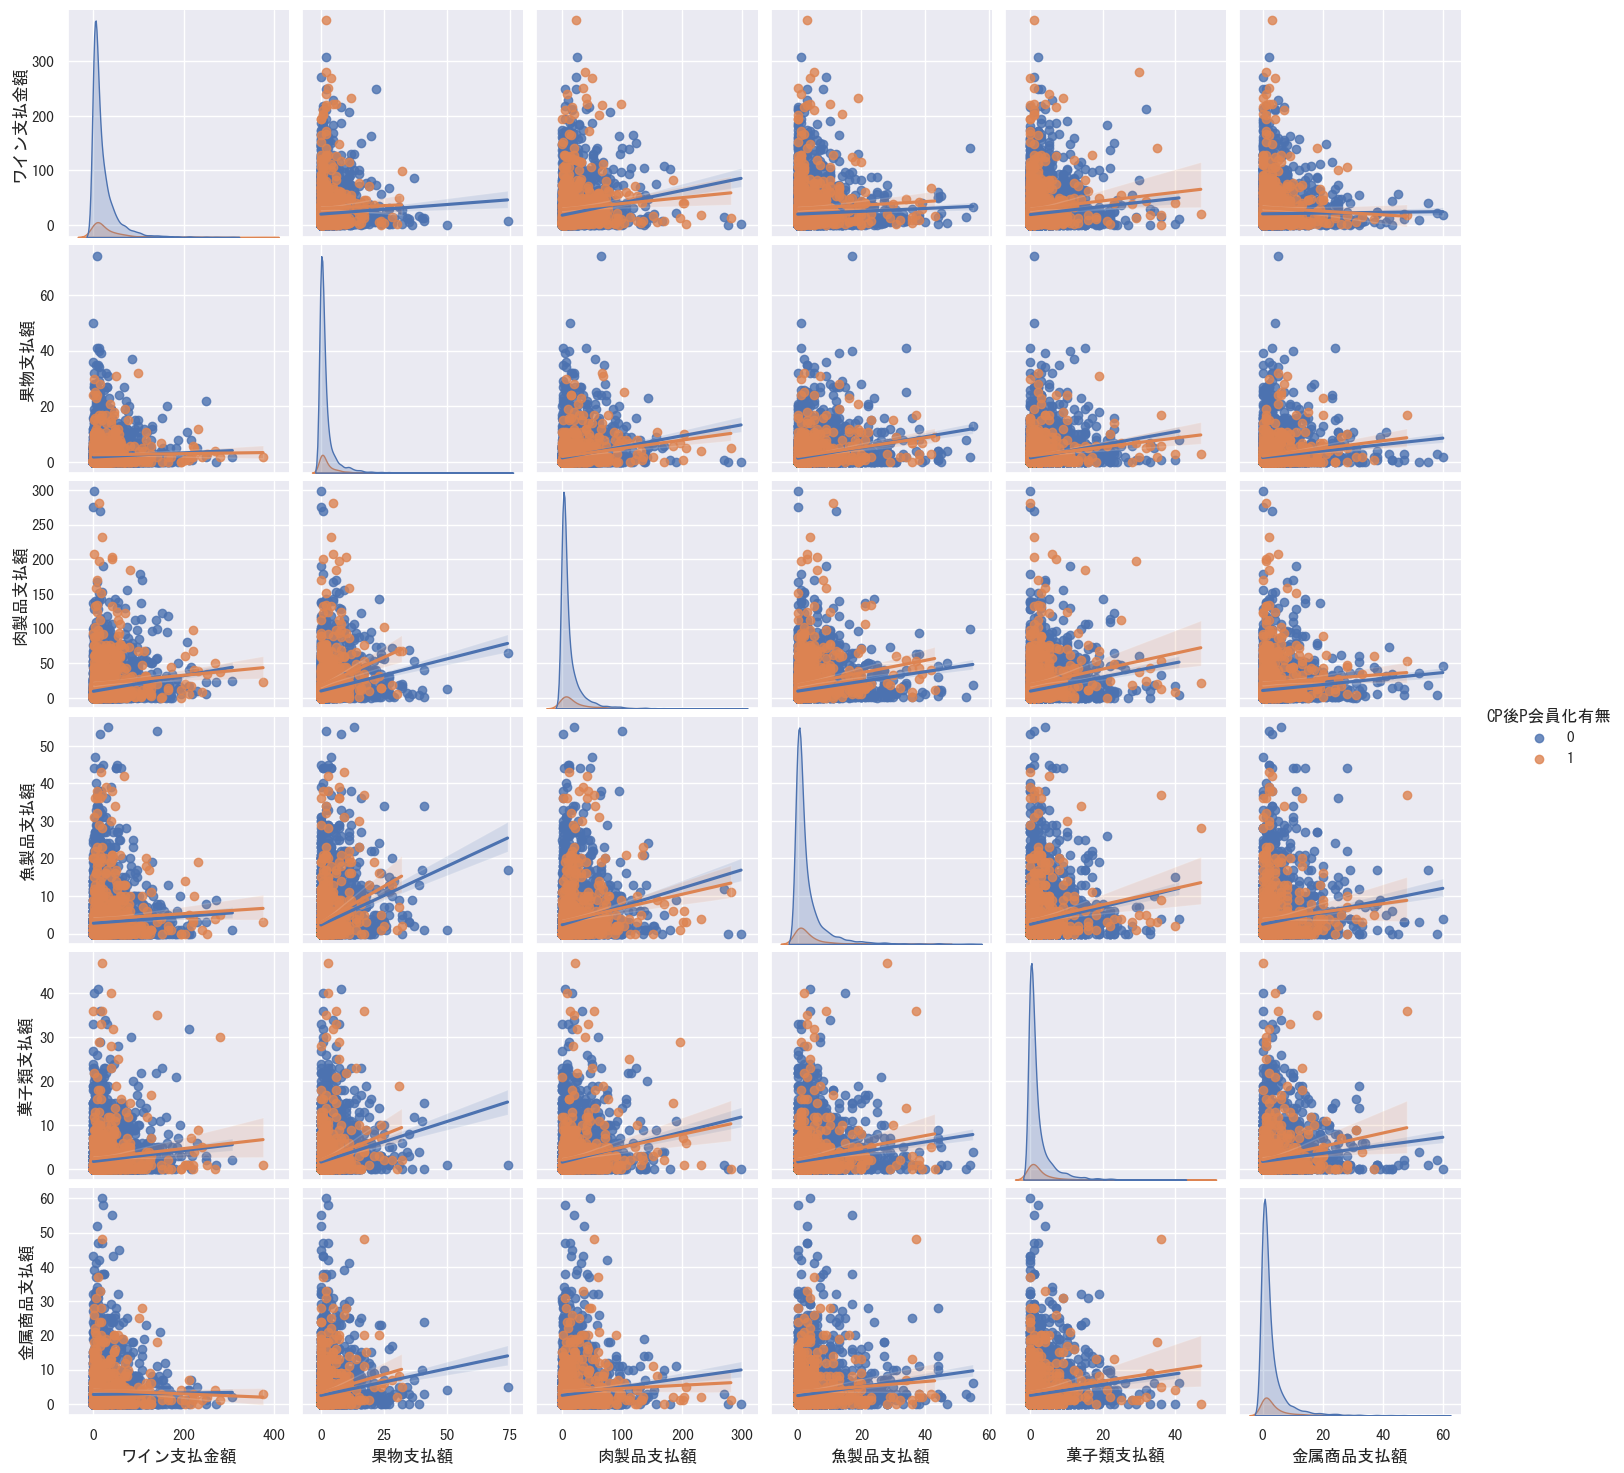

In [152]:
%matplotlib inline

# sns.jointplot(x='RM', y='Price', data=df)
sns.pairplot(df, hue=ctg, kind="reg", vars=pickup)
